In [40]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


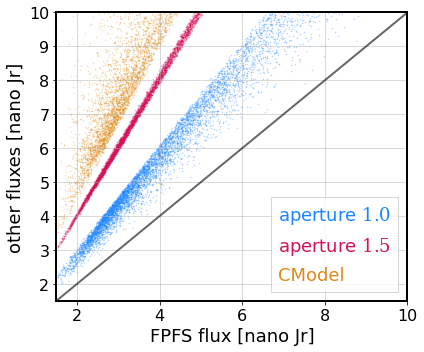

In [41]:
nver='var1em9' # 'var0em0'# 'var1em9'
hdat=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/src-0000-g1-0000.fits' %(gver,nver,ver)))
fdat=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-0000-g1-0000.fits' %(gver,nver,ver,dver)))
hdat=hdat[hdat['parent']==0]
ipos1=np.int_((hdat['base_NaiveCentroid_y']//64*100)+hdat['base_NaiveCentroid_x']//64)
ipos2=np.int_((fdat['fpfs_y']//64*100)+fdat['fpfs_x']//64)
assert np.all(ipos2==np.arange(10000))
fdat=fdat[ipos1]

size=0.3
alpha=0.3
rs=1.#2.5
pix_scale=1.

plt.close()
fig,axes=pltutil.make_figure_axes(ny=1,nx=1,square=False)

ax=axes[0]
ax.scatter(fdat['fpfs_M00']/(pix_scale)**2.*rs,hdat['base_CircularApertureFlux_3_0_instFlux'],s=size,color=pltutil.colors0[1],alpha=alpha,label='aperture $1.0$')
ax.scatter(fdat['fpfs_M00']/(pix_scale)**2.*rs,hdat['base_CircularApertureFlux_4_5_instFlux'],s=size,color=pltutil.colors0[2],alpha=alpha,label='aperture $1.5$')
ax.scatter(fdat['fpfs_M00']/(pix_scale)**2.*rs,hdat['modelfit_CModel_instFlux'],s=size,color=pltutil.colors0[3],alpha=alpha,label='CModel')
x=np.linspace(0,20,100)
ax.plot(x,x,'-',color='black',alpha=0.6)
ax.set_xlabel('FPFS flux [nano Jr]')
ax.set_ylabel('other fluxes [nano Jr]')
ax.set_xlim(1.5,10)
ax.set_ylim(1.5,10)
ax.grid()

leg=ax.legend(fontsize=18,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    text.set_color(pltutil.colors0[it+1])

#ax=axes[1]
#ax.scatter((fdat['fpfs_M00']+fdat['fpfs_M20'])/0.168**2.,hdat['ext_shapeHSM_HsmSourceMoments_xx']+hdat['ext_shapeHSM_HsmSourceMoments_yy'],\
#           s=0.04,color=pltutil.colors[1],alpha=0.1)
#ax.set_xlabel('fpfs trace')
#ax.set_ylabel('regauss trace')
#ax.set_xlim(-1,40)
#ax.set_ylim(-1,40)
fig.tight_layout()
fig.savefig('compare_fluxes.pdf')

In [ ]:
-2.5 * np.log10(2.5)

-0.994850021680094

In [86]:
10**((24.5- 27.)/(-2.5))*(0.168)**2./2.5

0.11289600000000002